# Forecasting Solar-Energy
### Objective
The primary objective is to build and evaluate a predictive model, with a focus on understanding the relative importance of different features in making predictions. With more solar power integrated into power systems, accurately forecast the power outputs from solar power becomes crucial for reliable and economic operation of the system. The conventional generators need to follow up and ramp down based on the power increase and decline of solar power during sunrise and sunset. During cloudy days, it is also important to forecast the power fluctuations of solar power to prepare adequate reserve capacities. The model deals with structured data needed for solar power forecasting and aims to optimize prediction accuracy while providing explainability with a simple example.  
We use historical time-series data from a specified region in Mississippi from 2006 to analyze and forecast solar-energy output. 
We want to reiterate that the purpose of this module is not to provide the most accurate forecast, but to demonstrate the process of developing a machine learning pipeline for solar power forecasting and analyzing feature importance for interpretability. The dataset used in this module is a sample dataset for demonstration purposes only. The techniques and methods used in this module can be applied to other datasets for solar power forecasting. The procedure of other forecasting methods could be quite different than this method. But the main data processing steps should be similar. 


### Purpose
- To develop a machine learning pipeline for solar power forecasting purpuse.
- To analyze feature importance for forecasting results interpretability.
- To improve predictive accuracy using feature engineering and optimization techniques.

### Who is this useful for?
- Data Scientists: Interested in understanding feature importance in forecasting models.
- Decision-Makers: Seeking insights from the predictions for actionable strategies.
- Students & Researchers: Exploring predictive modeling and feature analysis.

### Applications
- Predicting outcomes in structured data for solar power forecasting (e.g., sales, risk assessment, customer behavior).
- Identifying key drivers influencing outcomes for resource allocation.
- Benchmarking forecasting performance (accuracy) against baseline algorithms.

### Notebook Components
1. Data Preparation: Importing, cleaning, and preprocessing data for modeling. Prepare the historical time-series data for solar power forecasting. 
2. Model Development: Training machine learning models.
   - ARIMA model-ARIMA stands for AutoRegressive Integrated Moving Average. It is a popular statistical method used for time series forecasting. The ARIMA model is characterized by three main components: 1. AutoRegressive (AR) part: This part involves regressing the variable on its own lagged (past) values. The number of lagged values to include is denoted by p. 2. Integrated (I) part: This part involves differencing the data to make it stationary, which means that the mean and variance are constant over time. The number of differences needed to achieve stationarity is denoted by d. 3. Moving Average (MA) part: This part involves modeling the error term as a linear combination of error terms occurring at various times in the past. The number of lagged error terms to include is denoted by q.The ARIMA model is generally denoted as ARIMA(p, d, q), where: p is the number of lag observations included in the model (lag order). d is the number of times that the raw observations are differenced. q is the size of the moving average window. Steps to Build an ARIMA Model: Identification: Determine the values of p, d, and q using techniques like the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots. Estimation: Fit the ARIMA model to the time series data using the identified parameters.Diagnostic Checking: Check the residuals of the model to ensure that they resemble white noise (i.e., they are normally distributed with a mean of zero and constant variance). Forecasting: Use the fitted ARIMA model to make future predictions. 
   - Prophet model-Prophet is an open-source forecasting tool developed by Facebook. It is designed to handle time series data that may have daily, weekly, and yearly seasonality, along with holiday effects. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well. It works best with time series that have strong seasonal effects and several seasons of historical data. The model is intuitive and allows for easy incorporation of additional regressors to improve forecast accuracy. Steps to Build a Prophet Model: Data Preparation: Ensure the data is in the correct format with columns 'ds' (date) and 'y' (value to forecast). Model Initialization: Create a Prophet object and specify any seasonalities or holidays. Model Fitting: Fit the model to the historical data. Forecasting: Use the fitted model to make future predictions. Visualization: Plot the forecasted values along with the historical data to visualize the model's performance.
   - LightGBM model- LightGBM (Light Gradient Boosting Machine) is a highly efficient and scalable gradient boosting framework that uses tree-based learning algorithms. It is designed to be distributed and efficient with the following key features: Gradient Boosting: LightGBM is based on the gradient boosting framework, which builds models sequentially. Each new model attempts to correct the errors made by the previous models. This is done by minimizing a loss function using gradient descent. Tree-Based Learning: LightGBM uses decision trees as its base learners. Specifically, it uses a technique called Gradient-based One-Side Sampling (GOSS) and Exclusive Feature Bundling (EFB) to speed up the training process and reduce memory usage. Efficiency: LightGBM is designed to be highly efficient in terms of both speed and memory usage. It achieves this through several optimizations: Histogram-based decision tree learning: This reduces the complexity of finding the best split. Leaf-wise tree growth: Unlike level-wise tree growth used in other frameworks, LightGBM grows trees leaf-wise, which can lead to deeper trees and better accuracy. GOSS and EFB: These techniques further improve efficiency by reducing the number of data instances and features considered during training. Scalability: LightGBM can handle large datasets and high-dimensional data efficiently. It supports parallel and distributed learning, making it suitable for big data applications. Accuracy: Due to its efficient implementation and advanced techniques, LightGBM often achieves higher accuracy compared to other gradient boosting frameworks.
3. Feature Importance Analysis: Evaluating which features contribute the most to predictions. Analayze the key factors in solar power forecating. 
4. Visualization: Graphically representing feature importance for interpretability.

In [6]:
# Import all the required libraries, pandas for data analytics, numpy for numerical calculation, matplotlib for plotting and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
!{sys.executable} -m pip install statsmodels
!{sys.executable} -m pip install scikit-learn
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Update submodules to fetch data

In [7]:
pd.set_option('display.max_rows', 300) #set the limit for the maximum number of rows in display

In [8]:

# # define data path for the input data of historical 5 minutes solar power output
# # file path
# df = pd.read_csv("ms-pv-2006/Actual_30.25_-89.45_2006_UPV_118MW_5_Min.csv")
import os
import pandas as pd

current_dir = os.getcwd()
csv_path = os.path.join(current_dir, "ms-pv-2006", "Actual_30.25_-89.45_2006_UPV_118MW_5_Min.csv")

# # read the historical data with pandas
df = pd.read_csv(csv_path)
data = pd.read_csv(csv_path)

Add a new column "DateTime", with the following format specified and make it our index for later use

In [9]:
df['Datetime'] = pd.to_datetime(df['LocalTime'], format='%m/%d/%y %H:%M')
df.set_index('Datetime', inplace=True)


In [10]:
df

,LocalTime,Power(MW)
Datetime,,
2006-01-01 00:00:00,01/01/06 00:00,0.0
2006-01-01 00:05:00,01/01/06 00:05,0.0
2006-01-01 00:10:00,01/01/06 00:10,0.0
2006-01-01 00:15:00,01/01/06 00:15,0.0
2006-01-01 00:20:00,01/01/06 00:20,0.0
...,...,...
2006-12-31 23:35:00,12/31/06 23:35,0.0
2006-12-31 23:40:00,12/31/06 23:40,0.0
2006-12-31 23:45:00,12/31/06 23:45,0.0


In [11]:
# # show historical data
dff = df['Power(MW)']
df.head(200)

,LocalTime,Power(MW)
Datetime,,
2006-01-01 00:00:00,01/01/06 00:00,0.0
2006-01-01 00:05:00,01/01/06 00:05,0.0
2006-01-01 00:10:00,01/01/06 00:10,0.0
2006-01-01 00:15:00,01/01/06 00:15,0.0
2006-01-01 00:20:00,01/01/06 00:20,0.0
2006-01-01 00:25:00,01/01/06 00:25,0.0
2006-01-01 00:30:00,01/01/06 00:30,0.0
2006-01-01 00:35:00,01/01/06 00:35,0.0
2006-01-01 00:40:00,01/01/06 00:40,0.0


In [12]:
data['LocalTime'] = pd.to_datetime(data['LocalTime'], format='%m/%d/%y %H:%M')
data = data.rename(columns={'LocalTime': 'ds', 'Power(MW)': 'y'})

In [13]:
if data['y'].isnull().sum() > 0:
    data['y'].fillna(method='ffill', inplace=True)

data_hourly = data.resample('H', on='ds').mean().reset_index()

/tmp/ipykernel_66954/3612108113.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data_hourly = data.resample('H', on='ds').mean().reset_index()


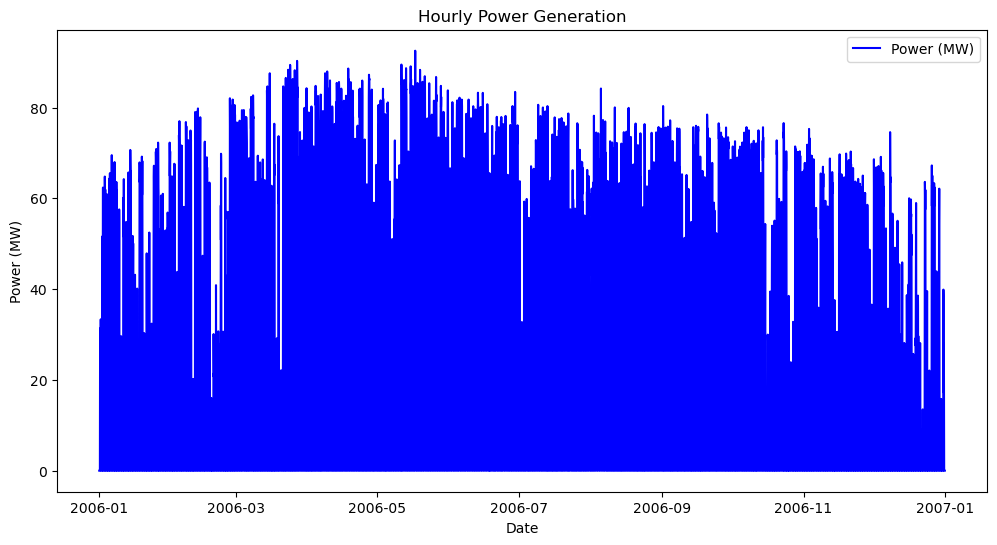

In [14]:
# # plot the one-year historical solar generation curve
plt.figure(figsize=(12, 6))
plt.plot(data_hourly['ds'], data_hourly['y'], color='b', label='Power (MW)')
plt.xlabel('Date')
plt.ylabel('Power (MW)')
plt.title('Hourly Power Generation')
plt.legend()
plt.show()

From the overview, our data seems to have high daily seasonality, with zeros in the nighttime and peak power output during the day.

### Arima
We begin our forecasting with the **Auto-Regressive Integrated Moving Average (ARIMA)** model, a widely used method for time-series forecasting. ARIMA is particularly effective for univariate data that is stationary, meaning its statistical properties such as mean and variance are constant over time. However, our dataset exhibits daily seasonality, with power output peaking during the day and dropping to zero at night. This inherent seasonality suggests that our data may not be strictly stationary, which could impact the model's accuracy. Despite this, we proceed with ARIMA to establish a baseline and will consider additional preprocessing steps, such as differencing, to address non-stationarity and improve model performance.

In [15]:
# # check whether the input data of historical solar power satisfy the requirement
def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] > 0.05:
        print("Series is non-stationary")
    else:
        print("Series is stationary")

The **Augmented Dickey-Fuller (ADF)** test is a statistical test used to determine if a time series is stationary, meaning its statistical properties such as mean, variance, and autocorrelation are constant over time. The test works by assessing the null hypothesis that a unit root is present in the time series data, which would indicate non-stationarity. If the p-value obtained from the test is below a certain threshold (commonly 0.05), the null hypothesis is rejected, suggesting that the series is stationary. Conversely, a p-value above the threshold indicates that the series is non-stationary and may require differencing or other transformations to achieve stationarity.

In [16]:
adf_test(dff)

ADF Statistic: -39.02861991156054
p-value: 0.0
Series is stationary


The ADF test has a loose confidence interval and suggests our data is stationary, which may not necessarily be true, but we move on with it and do not use **differencing**.     **Differencing** is a transformation technique used in time series analysis to make a non-stationary series stationary by removing trends or seasonality. It involves subtracting the previous observation from the current observation.   
Though we might want to try differencing later.

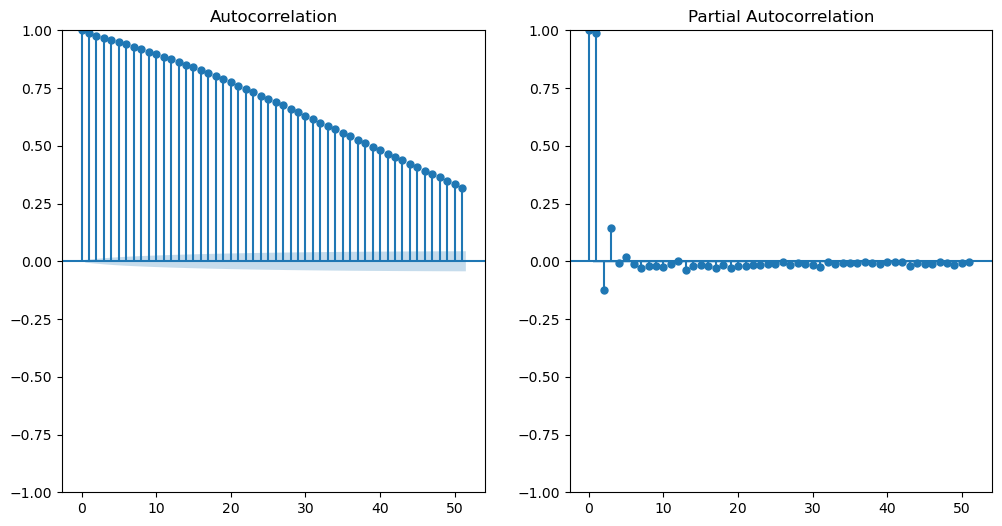

In [17]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plot_acf(dff, ax=plt.gca())
plt.subplot(122)
plot_pacf(dff, ax=plt.gca())
plt.show()

The ARIMA model has p, d and q values that we have to select based on our data. We use these acf and pacf graphs to determine those values.  
From the graphs above we understand that differencing is required for our data.

In [18]:
# Differencing
df['PowerDiff'] = dff.diff().dropna()
diff = df['PowerDiff']

Construct the plot again for our differenced data.

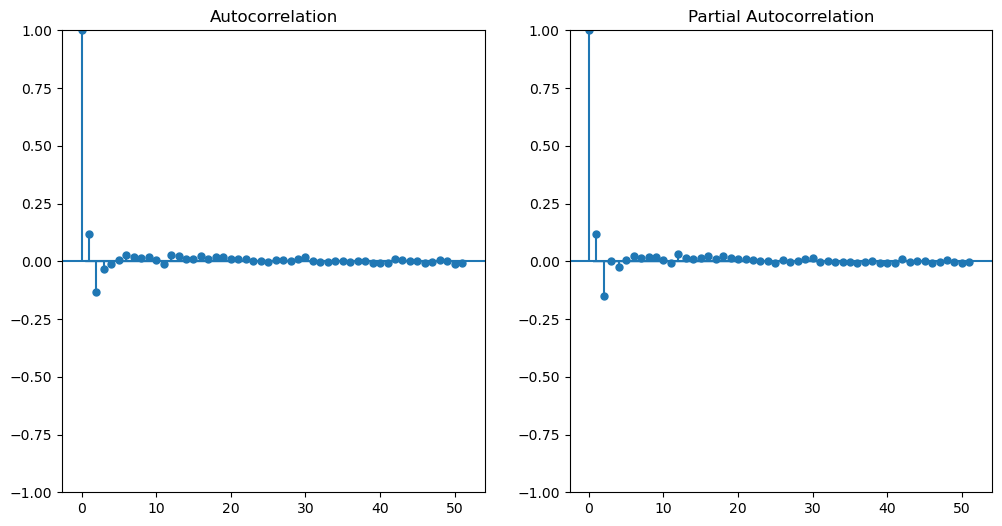

In [19]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plot_acf(diff.dropna(), ax=plt.gca())  # ACF for 'q'
plt.subplot(122)
plot_pacf(diff.dropna(), ax=plt.gca())  # PACF for 'p'
plt.show()

We can finally see from the graps what values for p, d, and q we need to take for our model. p = 2, d = 0 and q = 2.  
We can also check if our assumptions are correct using the grid-search algorithm to calculate the best order for our model.

In [20]:
import warnings
from statsmodels.tsa.arima.model import ARIMA
warnings.filterwarnings("ignore")

def evaluate_arima_model(X, arima_order):
    model = ARIMA(X, order=arima_order)
    model_fit = model.fit()
    return model_fit.aic


def grid_search_arima(data, p_values, d_values, q_values):
    best_aic = float("inf")
    best_order = None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    aic = evaluate_arima_model(data, (p,d,q))
                    if aic < best_aic:
                        best_aic = aic
                        best_order = (p, d, q)
                except:
                    continue
    return best_order


p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)


best_order = grid_search_arima(dff, p_values, d_values, q_values)
print(f'Best ARIMA order: {best_order}')

Best ARIMA order: (2, 0, 2)


In [21]:
# Splitting the data into test and train.
train_size = int(len(df) * 0.8)
train, test = dff[:train_size], dff[train_size:]

In [22]:
# Fitting the model
best_p, best_d, best_q = best_order
model = ARIMA(train, order=(best_p, best_d, best_q))
model_fit = model.fit()


predictions = model_fit.forecast(steps=len(test))


mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

RMSE: 25.9281711705478


Output the values at different times of day to check our prediction

In [23]:
print(predictions[:21024:100])
print(f"Test set length: {len(test)}, Predictions length: {len(predictions)}")

2006-10-20 00:00:00     0.242440
2006-10-20 08:20:00    15.077833
2006-10-20 16:40:00    20.586042
2006-10-21 01:00:00    22.638099
2006-10-21 09:20:00    23.402582
2006-10-21 17:40:00    23.687387
2006-10-22 02:00:00    23.793489
2006-10-22 10:20:00    23.833017
2006-10-22 18:40:00    23.847743
2006-10-23 03:00:00    23.853229
2006-10-23 11:20:00    23.855273
2006-10-23 19:40:00    23.856034
2006-10-24 04:00:00    23.856318
2006-10-24 12:20:00    23.856424
2006-10-24 20:40:00    23.856463
2006-10-25 05:00:00    23.856478
2006-10-25 13:20:00    23.856483
2006-10-25 21:40:00    23.856485
2006-10-26 06:00:00    23.856486
2006-10-26 14:20:00    23.856486
2006-10-26 22:40:00    23.856486
2006-10-27 07:00:00    23.856486
2006-10-27 15:20:00    23.856486
2006-10-27 23:40:00    23.856486
2006-10-28 08:00:00    23.856486
2006-10-28 16:20:00    23.856486
2006-10-29 00:40:00    23.856486
2006-10-29 09:00:00    23.856486
2006-10-29 17:20:00    23.856486
2006-10-30 01:40:00    23.856486
2006-10-30

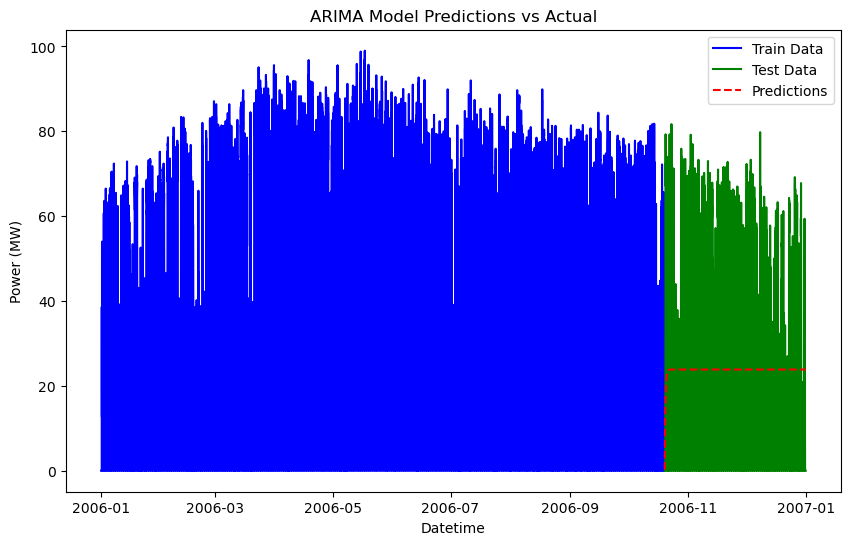

In [24]:
# Plot
plt.figure(figsize=(10,6))
plt.plot(train.index, train, label='Train Data', color='blue')
plt.plot(test.index, test, label='Test Data', color='green')
plt.plot(test.index, predictions, label='Predictions', color='red', linestyle='--')
plt.legend()
plt.xlabel('Datetime')
plt.ylabel('Power (MW)')
plt.title('ARIMA Model Predictions vs Actual')
plt.show()

We can see from our data and the plot, our prediction sharply increases and peaks at around 23, both for the daytime and the night time, which has a very poor accuracy.

In [25]:
# Forecast next 100 values
future_steps = 100
forecast = model_fit.forecast(steps=future_steps)

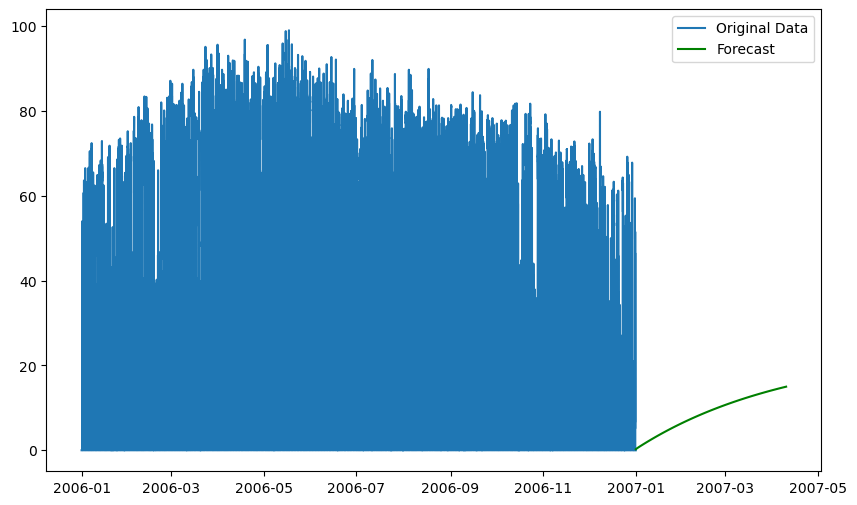

In [26]:
# Plot
plt.figure(figsize=(10,6))
plt.plot(df.index, dff, label='Original Data')  # Replace 'Value' with correct column name
plt.plot(pd.date_range(df.index[-1], periods=future_steps, freq='D'), forecast, label='Forecast', color='green')
plt.legend()
plt.show()

ARIMA yeilded a poor prediction potentially due to our data being highly seasonal. So we try to use a model that is known for handing seasonal data effectively.

## Prophet
The Prophet model, developed by Meta, is a robust and user-friendly tool for time series forecasting. It is particularly well-suited for data with strong seasonal patterns and missing values, as well as scenarios where the data may have outliers or trend changes. Below is an overview of the Prophet model and its components.

In [27]:
import sys
!{sys.executable} -m pip install prophet
from prophet import Prophet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 83.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 820.7/820.7 kB 55.4 MB/s eta 0:00:00


In [28]:
import os
current_dir = os.getcwd()
csv_path = os.path.join(current_dir, "ms-pv-2006", "Actual_30.25_-89.45_2006_UPV_118MW_5_Min.csv")
data = pd.read_csv(csv_path)

In [29]:
data['LocalTime'] = pd.to_datetime(data['LocalTime'], format='%m/%d/%y %H:%M')
data = data.rename(columns={'LocalTime': 'ds', 'Power(MW)': 'y'})

In [30]:
if data['y'].isnull().sum() > 0:
    data['y'].fillna(method='ffill', inplace=True)

data_hourly = data.resample('H', on='ds').mean().reset_index()

In [31]:
split_index = int(len(data_hourly) * 0.8)
train_data = data_hourly[:split_index]
test_data = data_hourly[split_index:]

In [32]:
# Fit the model
model = Prophet(yearly_seasonality=True, daily_seasonality=True, weekly_seasonality=True)
model.fit(train_data)

17:28:17 - cmdstanpy - INFO - Chain [1] start processing
17:28:17 - cmdstanpy - INFO - Chain [1] done processing


In [33]:
# Make future predictions
future = model.make_future_dataframe(periods=24*30, freq='H')
forecast = model.predict(future)

In [34]:
test_forecast = forecast.merge(test_data, on='ds', how='right')

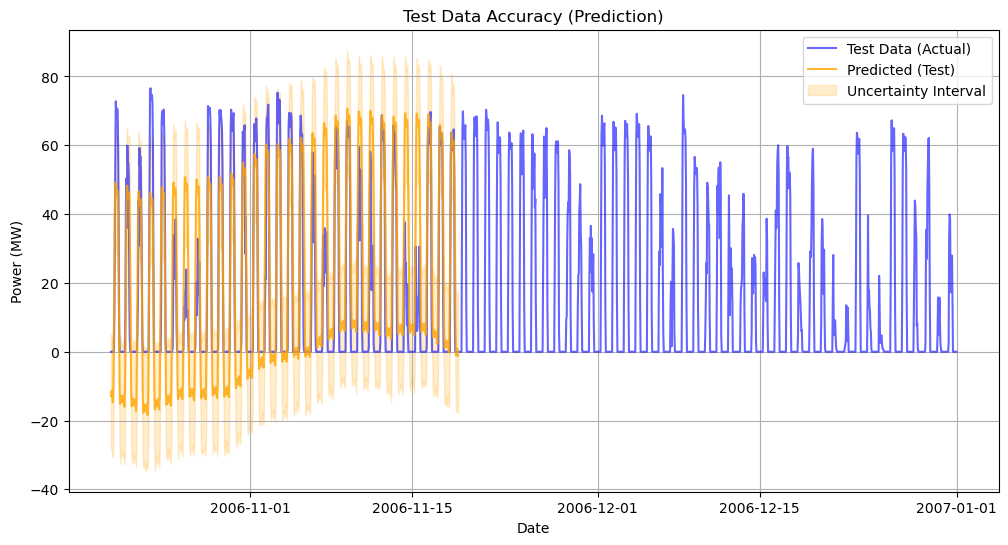

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(test_data['ds'], test_data['y'], label='Test Data (Actual)', color='blue', alpha=0.6)
plt.plot(test_forecast['ds'], test_forecast['yhat'], label='Predicted (Test)', color='orange', alpha=0.8)
plt.fill_between(test_forecast['ds'], test_forecast['yhat_lower'], test_forecast['yhat_upper'], color='orange', alpha=0.2, label='Uncertainty Interval')
plt.title("Test Data Accuracy (Prediction)")
plt.xlabel("Date")
plt.ylabel("Power (MW)")
plt.legend()
plt.grid()
plt.show()

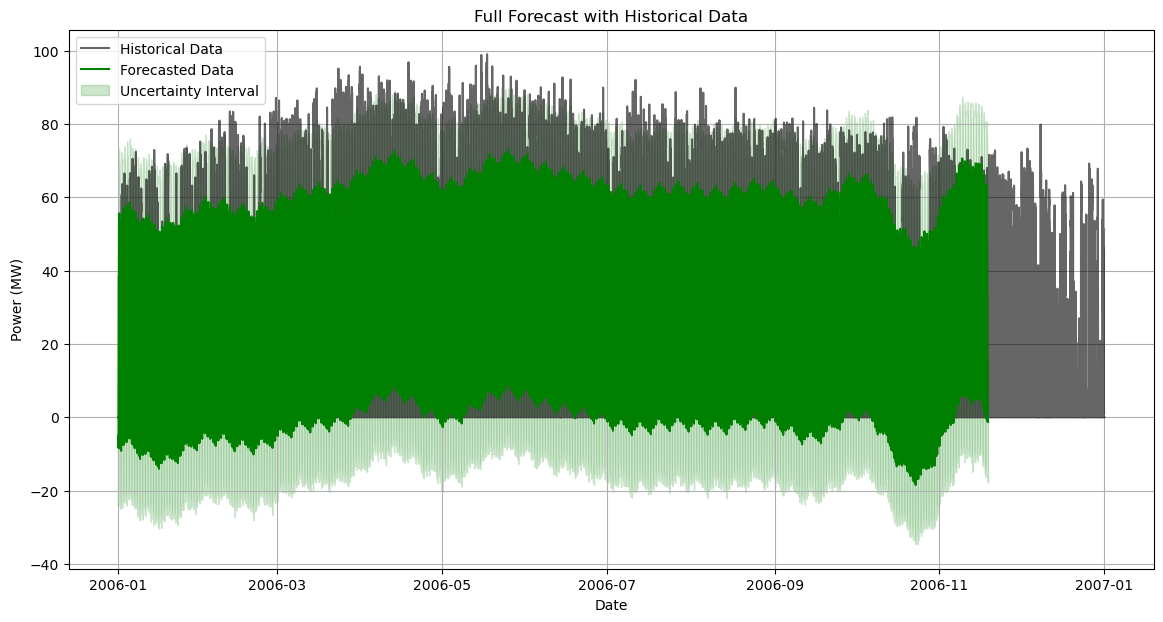

In [36]:
plt.figure(figsize=(14, 7))
plt.plot(data['ds'], data['y'], label='Historical Data', color='black', alpha=0.6)
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Data', color='green')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='green', alpha=0.2, label='Uncertainty Interval')
plt.title("Full Forecast with Historical Data")
plt.xlabel("Date")
plt.ylabel("Power (MW)")
plt.legend()
plt.grid()
plt.show()

In [37]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][:7000:70]

,ds,yhat,yhat_lower,yhat_upper
0,2006-01-01 00:00:00,-6.665930,-24.240018,10.358625
70,2006-01-03 22:00:00,-4.474233,-20.038008,11.853261
140,2006-01-06 20:00:00,-6.592283,-22.713803,9.164866
210,2006-01-09 18:00:00,-5.583250,-22.844907,12.420671
280,2006-01-12 16:00:00,26.849308,10.893639,44.342990
350,2006-01-15 14:00:00,48.079698,31.277399,63.720274
420,2006-01-18 12:00:00,49.432818,32.739164,65.115053
490,2006-01-21 10:00:00,53.029588,37.641518,69.696168
560,2006-01-24 08:00:00,45.396122,29.912687,61.725492
630,2006-01-27 06:00:00,10.705178,-6.510347,26.607076


#### Accuracy

We can see that we have increased our accuracy greatly, using this model accounting for all the seasonality, but still it is predicting values to be less than 0 as well, which can never happen in our model.

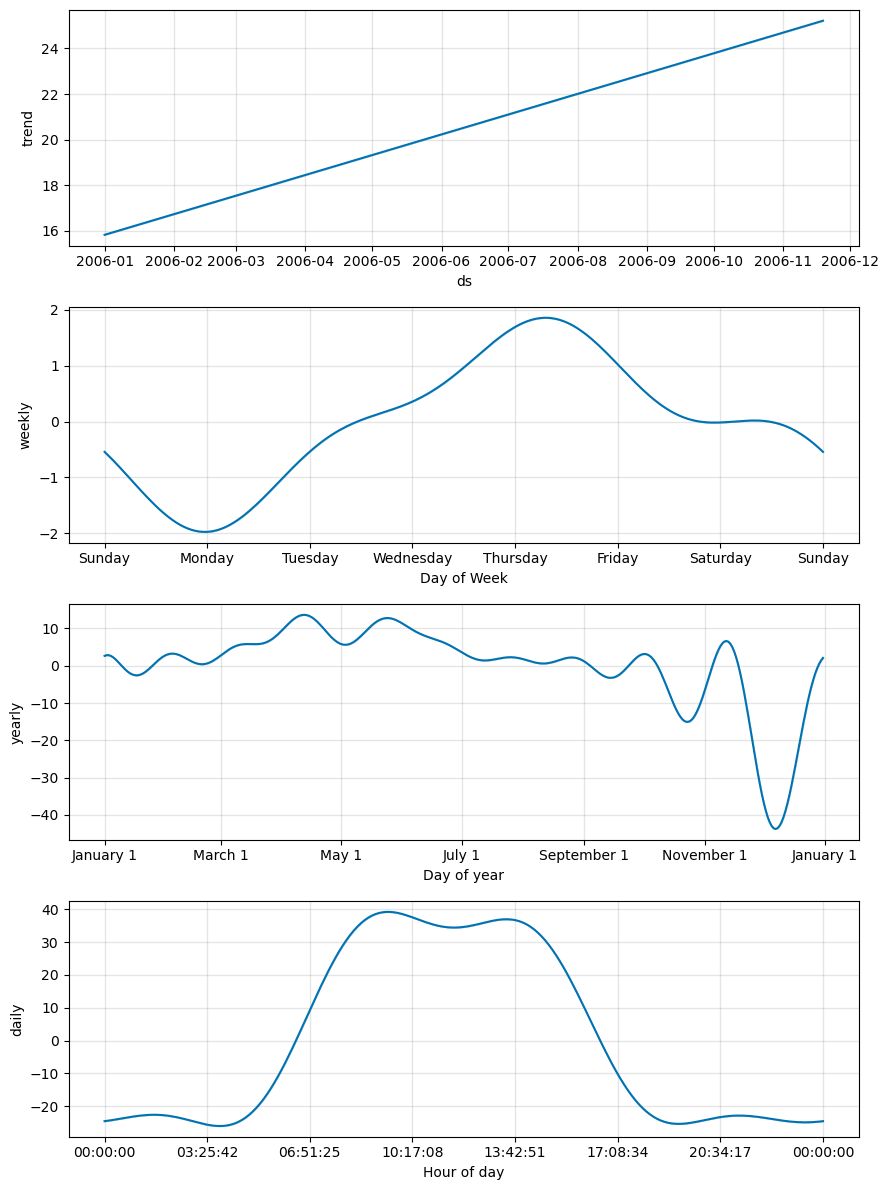

In [38]:
model.plot_components(forecast)
plt.show()

These plots reveal the seasonality patterns in our forecasted data, highlighting the underlying trends of the data.  
Until now we have not taken account of the seasonality of the data before forecasting and have let the model take care of it by itself. We now try to take care of the seasonality of the data by ourselves.

## LightGBM with feature engineering
**LightGBM (Light Gradient Boosting Machine)** is a powerful and efficient gradient boosting framework widely used for machine learning tasks.

**Feature engineering** is the process of preparing and transforming raw data into features that better represent the underlying problem to improve the performance of a machine learning model. A feature is an individual measurable property or characteristic of a phenomenon being observed, often represented as a column in a dataset.  
The goal of feature engineering is to extract the most relevant information from the raw data, making it easier for the model to learn patterns and make predictions.

In [39]:
import sys
!{sys.executable} -m pip install lightgbm
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 50.0 MB/s eta 0:00:00


In [40]:
import os
current_dir = os.getcwd()
csv_path = os.path.join(current_dir, "ms-pv-2006", "Actual_30.25_-89.45_2006_UPV_118MW_5_Min.csv")
data = pd.read_csv(csv_path)
data['LocalTime'] = pd.to_datetime(data['LocalTime'], format='%m/%d/%y %H:%M')


In [41]:
# Feature Engineering
data['hour'] = data['LocalTime'].dt.hour
data['day_of_week'] = data['LocalTime'].dt.dayofweek
data['month'] = data['LocalTime'].dt.month
data['is_daytime'] = ((data['hour'] >= 6) & (data['hour'] <= 18)).astype(int)

Add the features: hour, day of the week, month and is_daytime as columns to the data.

In [42]:
# Define features and target variable
X = data[['hour', 'day_of_week', 'month', 'is_daytime']]
y = data['Power(MW)']

In [43]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [44]:
# LightGBM Model Training
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [45]:
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

In [46]:
# Train the model with early stopping
model = lgb.train(
    params,
    lgb_train,
    valid_sets=[lgb_eval],  # Validation set
    num_boost_round=1000,
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),  # Early stopping callback
        lgb.log_evaluation(period=100)          # Log evaluation progress every 100 iterations
    ]
)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.041361 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 44
[LightGBM] [Info] Number of data points in the train set: 84096, number of used features: 4
[LightGBM] [Info] Start training from score 23.859394
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[38]	valid_0's rmse: 15.1899


In [47]:
# Predictions
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

In [48]:
# Evaluate the Model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

Root Mean Squared Error (RMSE): 15.189919633723044
Mean Absolute Error (MAE): 10.479850535578153


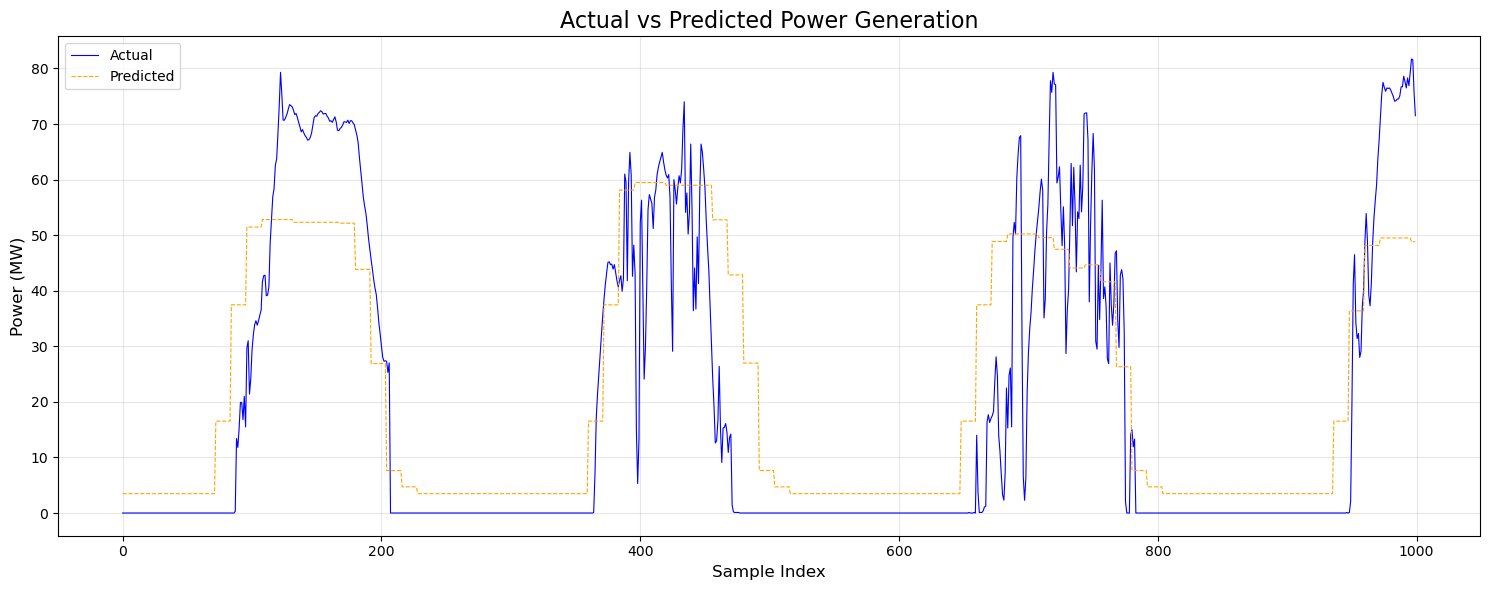

In [49]:
# Visualization: Actual vs Predicted
plt.figure(figsize=(15, 6))
plt.plot(y_test.values[:1000], label="Actual", color='blue', linewidth=0.8)
plt.plot(y_pred[:1000], label="Predicted", color='orange', linestyle='--', linewidth=0.8)
plt.title('Actual vs Predicted Power Generation', fontsize=16)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Power (MW)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

This yeilded a much better result than all the other models, with a low RMSE and MAE for a time series data with high seasonality. 

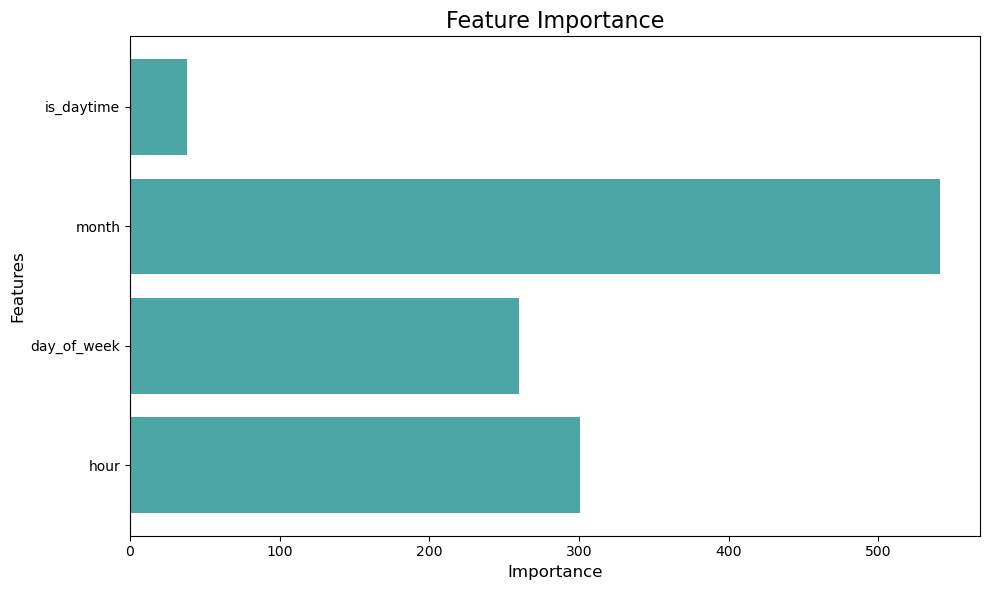

In [50]:
# Feature Importance
importance = model.feature_importance()
feature_names = X.columns
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance, color='teal', alpha=0.7)
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

The lower the value, the greater the importance, so as expected is_daytime which is a boolean that is true if the time of day is between 6 am and 6 pm and false rest of the time turned out to be the most important factor in a successful prediction.

## Key findings
- Due to a highly seasonal data, we can see how the accuracy improves when using models more suitable for such data, with gradient boosting integrated with featuring engineering yielding the best results.
- The most significant feature is is_daytime, a boolean indicating whether the observation falls between 6 AM and 6 PM, underscoring its importance in prediction success.
- Graphical representation clearly illustrates the ranking of feature importance.